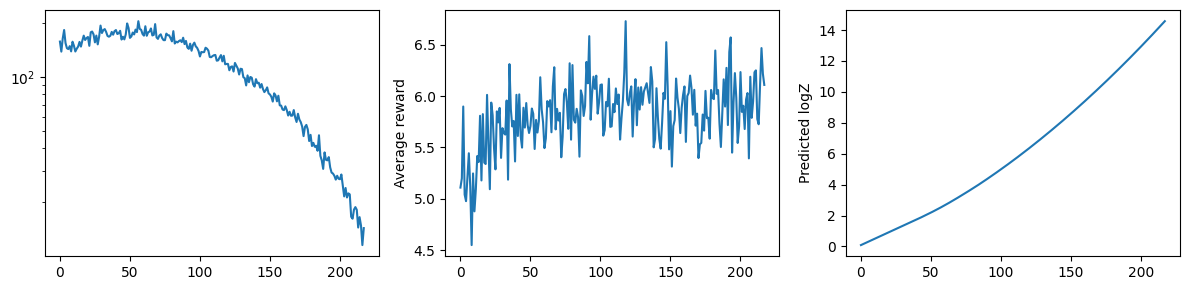

In [1]:
from gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator
cfg.log_dir = 'vanilla'
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(1, 3, figsize=(4*3,3))
ax[0].plot([i.value for i in ea.Scalars('train_loss')])
ax[0].set_yscale('log')
ax[1].set_ylabel('TB loss')
ax[1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])
ax[1].set_ylabel('Average reward')
ax[2].plot([i.value for i in ea.Scalars('train_logZ')])
ax[2].set_ylabel('Predicted logZ')
pp.tight_layout()

In [9]:
import importlib
import gflownet.utils.sqlite_log as sqll
importlib.reload(sqll)
results = sqll.read_all_results('D:/Dokumenter/Skole/Prosjektoppgave/prosjektKopi/pom_cpu-model/vanilla/train')
results

OperationalError: unable to open database file

In [3]:
!pip freeze > requirements.txt


In [7]:
import sqlite3
import os

path = './vanilla/train/'
db_files = [f for f in os.listdir(path) if f.startswith("generated_objs") and f.endswith(".db")]

for db_file in db_files:
    try:
        with sqlite3.connect(f"file:{path}/{db_file}?mode=ro", uri=True) as conn:
            conn.execute("SELECT 1")  # Test connection
        print(f"{db_file} is accessible.")
    except sqlite3.OperationalError as e:
        print(f"Error with {db_file}: {e}")

generated_objs_0.db is accessible.


In [10]:
import sqlite3
import pandas as pd

# Define the path to the accessible database
db_path = './vanilla/train/generated_objs_0.db'

# Attempt to read from the only existing database file
try:
    # Connect to the existing database and read the results table
    conn = sqlite3.connect(f"file:{db_path}?mode=ro", uri=True)
    results = pd.read_sql_query("SELECT * FROM results", conn)
    conn.close()
    print(results)
except sqlite3.OperationalError as e:
    print(f"Error accessing the database: {e}")

                        smi          r       fr_0  ci_beta
0           [O]N1C(=O)N1N=O   2.952363   2.952363      1.0
1              N#COn1on1[O]   7.587856   7.587855      1.0
2                         C   1.000000   1.000000      1.0
3      N1=C2[C]3N4C15N2C345   3.216017   3.216017      1.0
4               OOOn1[c]co1  11.010441  11.010441      1.0
...                     ...        ...        ...      ...
14075   [N]C1([O])c2[c]on21   5.510034   5.510034      1.0
14076             CNN(N)CON   6.287652   6.287652      1.0
14077              CCNC=COC   9.301150   9.301150      1.0
14078          CCC1(O)C=NC1   7.113266   7.113265      1.0
14079   [N]C12C3N1C1[C]C132   4.291440   4.291440      1.0

[14080 rows x 4 columns]


In [11]:
results

,smi,r,fr_0,ci_beta
0,[O]N1C(=O)N1N=O,2.952363,2.952363,1.0
1,N#COn1on1[O],7.587856,7.587855,1.0
2,C,1.000000,1.000000,1.0
3,N1=C2[C]3N4C15N2C345,3.216017,3.216017,1.0
4,OOOn1[c]co1,11.010441,11.010441,1.0
...,...,...,...,...
14075,[N]C1([O])c2[c]on21,5.510034,5.510034,1.0
14076,CNN(N)CON,6.287652,6.287652,1.0
14077,CCNC=COC,9.301150,9.301150,1.0
14078,CCC1(O)C=NC1,7.113266,7.113265,1.0


In [14]:
df = pd.read_csv("data.csv")
df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [17]:
common_smiles = set(df["nonStereoSMILES"]).intersection(results["smi"])
len(common_smiles)

21

In [19]:
# List of SMILES strings to filter by
smiles_list = list(common_smiles)

# Filter DataFrame rows where 'SMILES' column contains values from smiles_list
filtered_df = df[df['nonStereoSMILES'].isin(smiles_list)]

filtered_df

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CC(=O)O,pungent;sharp;sour,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,CCO,medicinal;alcoholic;ethereal;sweet,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,CN(C)C,sweaty;fruity;fishy;pungent;oily,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,CC(C)O,musty;woody;alcoholic,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100,CCN,ripe;cheesy;fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,CC(C)N,cheesy;fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,CC(C)(C)O,sweaty;musty;fermented;ethereal;camphoreous,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,COC=O,fresh;warm;rummy;fruity;winey;plum;ethereal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
288,CCCC(C)=O,rummy;woody;fruity;ketonic;sweet;winey;dairy;b...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [25]:


# Filter DataFrame rows where 'SMILES' column contains values from smiles_list
filtered_df2 = results[results['smi'].isin(smiles_list)]

filtered_df2

,smi,r,fr_0,ci_beta
16,CN,7.428786,7.428787,1.0
17,O,1.000000,1.000000,1.0
37,O,1.000000,1.000000,1.0
45,O,1.000000,1.000000,1.0
51,CN,7.428786,7.428787,1.0
...,...,...,...,...
11458,O,1.000000,1.000000,1.0
11727,CCCCC(C)=O,13.025182,13.025183,1.0
12107,CC(O)CN,8.532690,8.532691,1.0
12485,CCO,12.917239,12.917239,1.0


In [22]:
from rdkit import Chem

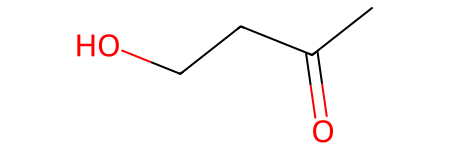

In [23]:
mol = Chem.MolFromSmiles("CC(=O)CCO")
mol

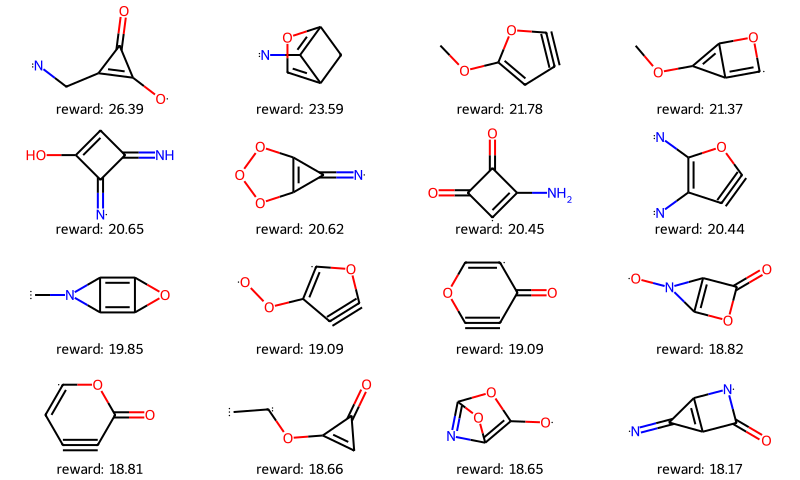

In [24]:
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
top_k = np.argsort(results['r'])[-16:][::-1]
rewards = results['r'][top_k]
mols = [Chem.MolFromSmiles(i) for i in results['smi'][top_k]]
MolsToGridImage(mols[:16], molsPerRow=4, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards])

In [28]:
results['smi'][top_k]


11753       [N]Cc1c([O])c1=O
11803          [N]c1c2coc1C2
1532              COc1cc#co1
10053         COc1c2[c]oc1-2
12368        [N]=c1c(O)cc1=N
7271          [N]=c1c2c1OOO2
6319         Nc1[c]c(=O)c1=O
10766         [N]c1c#coc1[N]
11911        [C]n1c2c3oc3c21
2094          [O]Oc1c#co[c]1
10681          O=c1c#coc[c]1
5980       [O]n1c2oc(=O)c1=2
4919           O=c1c#cc[c]o1
5098          [C][C]Oc1cc1=O
5226           [O]c1oc2nc1O2
7869     [N]=c1c2c1C(=O)[N]2
Name: smi, dtype: object